<a href="https://colab.research.google.com/github/agussazali/agussazali.github.io/blob/main/Portofolio_Balaji_Fast_Food_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Exploratory Data Analysis Balaji Fast Food Sales



# Import Library dan Upload Data

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

In [ ]:
# Baca file CSV
file_path = '/content/Balaji Fast Food Sales.csv'
data = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama data
(data.head())

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


# Data understanding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
transaction_type_counts = data['transaction_type'].value_counts(dropna=False)

In [ ]:
transaction_type_counts

transaction_type
Cash      476
Online    417
NaN       107
Name: count, dtype: int64

In [ ]:
# Mengisi nilai null dengan mode dari kolom 'transaction_type'
mode_transaction_type = data['transaction_type'].mode()[0]  # Mode dari kolom 'transaction_type'
data['transaction_type'] = data['transaction_type'].fillna(mode_transaction_type)




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    1000 non-null   object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
# Mengisi nilai null dengan mode dari kolom 'transaction_type'
mode_transaction_type = data['transaction_type'].mode()[0]  # Mode dari kolom 'transaction_type'
data['transaction_type'] = data['transaction_type'].fillna(mode_transaction_type)

# Menampilkan DataFrame setelah mengisi nilai null
(data)


,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,Cash,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,Cash,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,Cash,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,Cash,Mrs.,Afternoon


# Explorasi Data

In [ ]:
import pandas as pd

# Hitung total transaksi yang terjadi selama satu tahun
total_transactions = data.groupby(data['date']).size().sum()

# Hitung total uang yang dihasilkan selama satu tahun
total_revenue = data['transaction_amount'].sum()

# Temukan item name yang menjadi favorit
favorite_item = data['item_name'].value_counts().idxmax()

# Temukan transaction amount maksimum dan minimum
max_transaction_amount = data['transaction_amount'].max()
min_transaction_amount = data['transaction_amount'].min()

# Hitung rentang uang yang dikeluarkan pelanggan untuk sekali transaksi
transaction_amount_range = max_transaction_amount - min_transaction_amount

# Buat DataFrame dari hasil perhitungan
summary_data = pd.DataFrame({
    'Total Transaksi': [total_transactions],
    'Transaction Amount Max': [max_transaction_amount],
    'Transaction Amount Min': [min_transaction_amount],
    'Total Pendapatan': [total_revenue],
    'Item Name Favorit': [favorite_item],
    'Rentang Uang Transaksi': [transaction_amount_range]
})

# Tampilkan DataFrame
print("Ringkasan Transaksi Selama Satu Tahun:")
(summary_data)


Ringkasan Transaksi Selama Satu Tahun:


,Total Transaksi,Transaction Amount Max,Transaction Amount Min,Total Pendapatan,Item Name Favorit,Rentang Uang Transaksi
0,1000,900,20,275230,Cold coffee,880


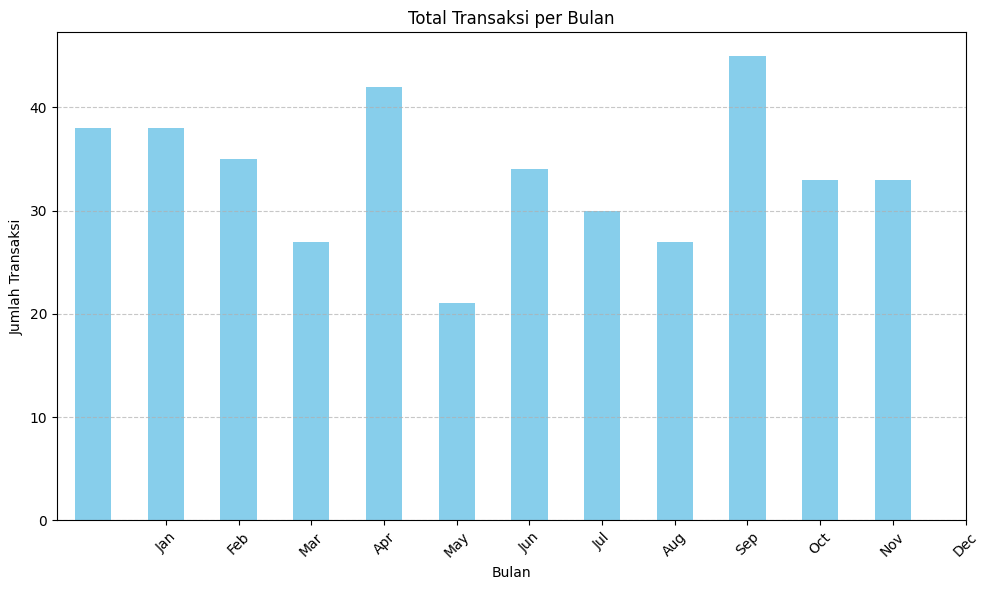

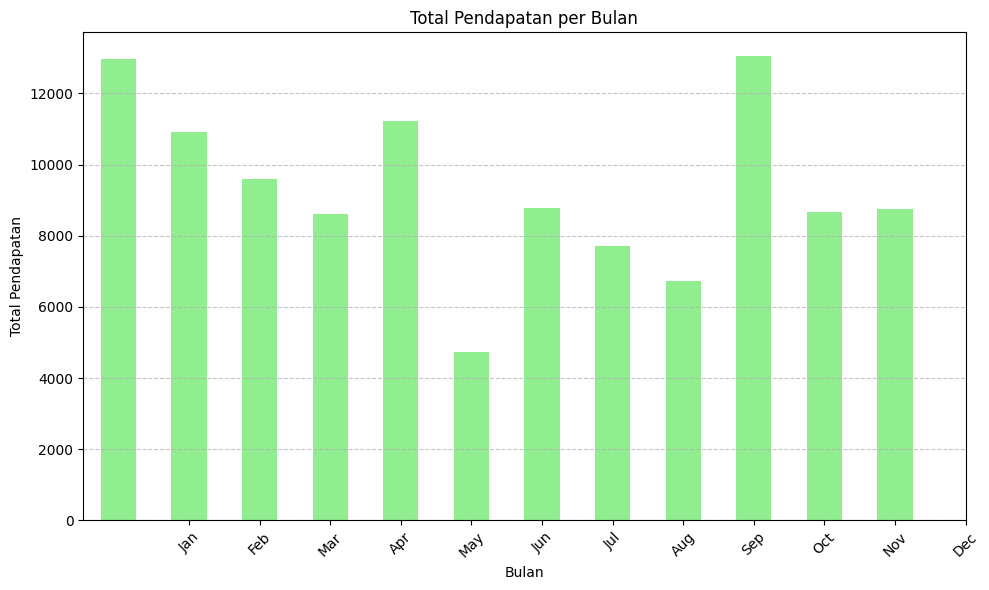

In [ ]:
import matplotlib.pyplot as plt

# Plot total transaksi per bulan
plt.figure(figsize=(10, 6))
data['date'] = pd.to_datetime(data['date'], errors='coerce')
transactions_per_month = data.groupby(data['date'].dt.month)['transaction_amount'].count()
transactions_per_month.plot(kind='bar', color='skyblue')
plt.title('Total Transaksi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot total pendapatan per bulan
plt.figure(figsize=(10, 6))
revenue_per_month = data.groupby(data['date'].dt.month)['transaction_amount'].sum()
revenue_per_month.plot(kind='bar', color='lightgreen')
plt.title('Total Pendapatan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Pendapatan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Tren Pembelian Selama Satu Tahun

In [ ]:
import pandas as pd

# DataFrame
# Saya asumsikan Anda telah memuat data Anda ke dalam DataFrame yang disebut df

# Ubah format kolom 'date' menjadi format datetime
data['date'] = pd.to_datetime(data['date'], format='mixed')

# Buat kolom baru yang berisi bulan dari setiap tanggal
data['month'] = data['date'].dt.month

# Hitung jumlah transaksi untuk setiap bulan
transactions_by_month = data.groupby(data['month']).size()

# Temukan bulan dengan jumlah transaksi tertinggi
max_transactions_month = transactions_by_month.idxmax()
max_transactions_count = transactions_by_month.max()

print("Bulan dengan jumlah transaksi tertinggi:", max_transactions_month)
print("Jumlah transaksi tertinggi:", max_transactions_count)



Bulan dengan jumlah transaksi tertinggi: 10.0
Jumlah transaksi tertinggi: 45


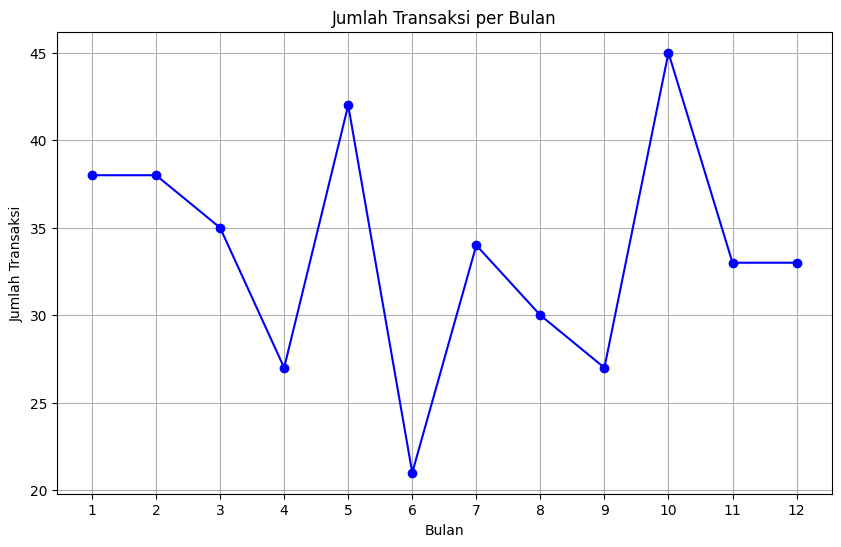

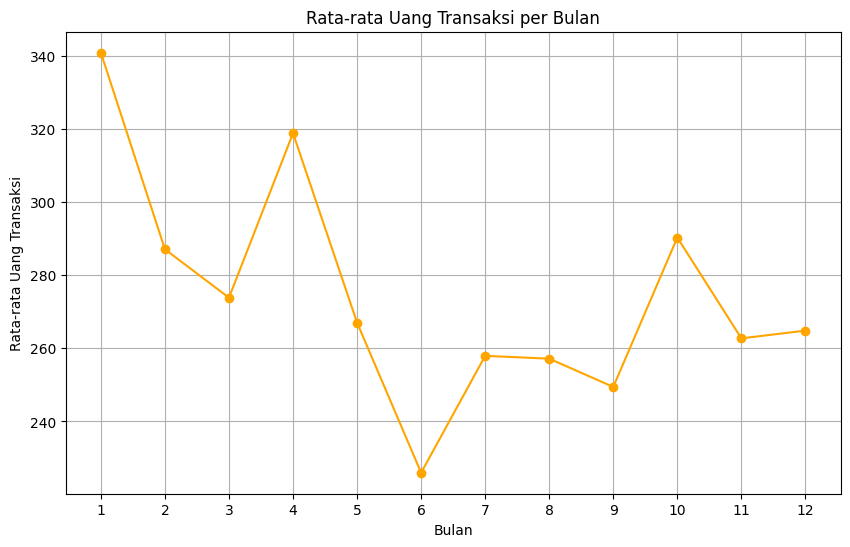

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Hitung jumlah transaksi untuk setiap bulan
transactions_by_month = data.groupby(data['month']).size()

# Hitung rata-rata uang transaksi untuk setiap bulan
average_transaction_amount_by_month = data.groupby(data['month'])['transaction_amount'].mean().round(2)

# Buat DataFrame dari hasil perhitungan
transactions_by_month_df = pd.DataFrame({
    'Bulan': transactions_by_month.index,
    'Jumlah Transaksi': transactions_by_month.values,
    'Rata-rata Uang Transaksi': average_transaction_amount_by_month.values
})

#Buat line chart untuk jumlah transaksi
plt.figure(figsize=(10, 6))
plt.plot(transactions_by_month_df['Bulan'], transactions_by_month_df['Jumlah Transaksi'], marker='o', linestyle='-', color='blue')
plt.title('Jumlah Transaksi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xticks(range(1, 13))  # 1-12 untuk setiap bulan
plt.grid(True)
plt.show()

# Buat line chart untuk rata-rata uang transaksi
plt.figure(figsize=(10, 6))
plt.plot(transactions_by_month_df['Bulan'], transactions_by_month_df['Rata-rata Uang Transaksi'], marker='o', linestyle='-', color='orange')
plt.title('Rata-rata Uang Transaksi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Uang Transaksi')
plt.xticks(range(1, 13))  # 1-12 untuk setiap bulan
plt.grid(True)
plt.show()



Dapat dilihat jumlah transaksi paling banyak terjadi pada bulan mei dengan 100 transaksi, sementara pada bulan 5 merupakan jumlah transaksi paling sedikit yaitu 67 transaksi. namun pada bulan tersebut jumlah transaksi uang yang terjadi pada bulan tersebut dibawah 270 dan untuk pengeluaran rata rata terbanyak tiap bulan terjadi pada bulan januari. perlu dilakukannya evaluasi untuk melihat penyebab terjadinya hal tersebut. dapat dilakukan dengan melakukan survei kepada pelanggan maupun memulai kampanye promo seperti promo "ajaktemanmu" atau promo bulan bulan tertentu, dan melakukan evaluasi apakah setelah promo ini berahir adakah terjadi peningkatan jumlah transaksi.

**Jumlah Transaksi Per Waktu**

In [ ]:
import pandas as pd

# Data yang Anda berikan
# Saya anggap Anda sudah memiliki DataFrame 'data' dengan kolom 'time_of_sale' dan 'transaction_amount'

# Hitung rata-rata transaksi untuk setiap waktu pembelian
average_transaction_by_time = data.groupby(data['time_of_sale'])['transaction_amount'].mean().round(2)

# Buat DataFrame dari hasil perhitungan
data_average_transaction = pd.DataFrame({
    'Time of Sale': average_transaction_by_time.index,
    'Rata rata Nilai transaksi': average_transaction_by_time.values
})


# Tampilkan DataFrame
print("Tabel Rata-Rata uang yang dikeluarkan selama Transaksi per Waktu Pembelian:")
(data_average_transaction)




Tabel Rata-Rata uang yang dikeluarkan selama Transaksi per Waktu Pembelian:


,Time of Sale,Rata rata Nilai transaksi
0,Afternoon,274.85
1,Evening,260.47
2,Midnight,254.90
3,Morning,282.79
4,Night,302.80


In [ ]:
import pandas as pd

# Misalnya, jika Anda memiliki DataFrame 'data' yang berisi data transaksi
# Anda dapat menghitung jumlah transaksi untuk setiap waktu pembelian
transaction_count_morning = data[data['time_of_sale'] == 'Morning'].shape[0]
transaction_count_afternoon = data[data['time_of_sale'] == 'Afternoon'].shape[0]
transaction_count_evening = data[data['time_of_sale'] == 'Evening'].shape[0]
transaction_count_midnight = data[data['time_of_sale'] == 'Midnight'].shape[0]




# Hitung rata-rata jumlah transaksi per waktu pembelian
average_transaction_counts = {
    'Waktu Pembelian': ['Pagi', 'Siang', 'Malam', 'Tengah Malam'],
    'Rata-rata Transaksi': [transaction_count_morning, transaction_count_afternoon, transaction_count_evening, transaction_count_midnight]
}

# Membuat DataFrame dari data
average_transaction_counts_df = pd.DataFrame(average_transaction_counts)

# Menampilkan DataFrame sebagai tabel
print("Tabel Rata-Rata Transaksi per Waktu Pembelian:")
(average_transaction_counts_df)



Tabel Rata-Rata Transaksi per Waktu Pembelian:


,Waktu Pembelian,Rata-rata Transaksi
0,Pagi,190
1,Siang,205
2,Malam,201
3,Tengah Malam,199


Malam dan pagi menjadi waktu dengan rata rata transaksi uang yang paling banyak dikeluarkan. ada indikasi bahwa pembeli pada pagi hari merupakan pekerja yang berkunjung untuk sarapan, dan malam hari sering terjadinya seseorang lapar dan malas untuk masak. ini dapat kita lakukan dengan meningkatkan jumlah pegawai dan meningkatkan efektivitas pelayanan. untuk jumlah transaksi yang terjadi sepertinya tidak ada perbedaan yang jauh dari keempat waktu tersebut.

In [ ]:
import pandas as pd

# DataFrame
# Saya asumsikan Anda telah memuat data Anda ke dalam DataFrame yang disebut data

# Filter data untuk "mr" dan "mrs"
mr_data = data[data['received_by'] == 'Mr.']
mrs_data = data[data['received_by'] == 'Mrs.']

# Hitung rata-rata pembelian untuk setiap waktu penjualan untuk "mr"
average_purchase_by_time_mr = mr_data.groupby('time_of_sale')['transaction_amount'].mean().round(2)

# Hitung rata-rata pembelian untuk setiap waktu penjualan untuk "mrs"
average_purchase_by_time_mrs = mrs_data.groupby('time_of_sale')['transaction_amount'].mean().round(2)

# Gabungkan hasilnya menjadi satu DataFrame
result_data = pd.DataFrame({
    'Time of Sale': average_purchase_by_time_mr.index,
    'Average Purchase (mr)': average_purchase_by_time_mr.values,
    'Average Purchase (mrs)': average_purchase_by_time_mrs.values
})

(result_data)


,Time of Sale,Average Purchase (mr),Average Purchase (mrs)
0,Afternoon,281.99,266.09
1,Evening,274.48,245.16
2,Midnight,262.41,249.30
3,Morning,276.70,289.56
4,Night,300.73,305.16


Pelanggan pria rata rata lebih banyak menghabiskan uang sekali transaksi dengan angka terendah pada tengah malam sebesar 262 dan tertinggi 300. namun untuk pelanggan wanita lebih rendah terhadap pria dalam sekali transaksi. tapi pada pagi malam hari perempuan lebih banyak mengeluarkan uang untuk sekali transaksi. kita dapat mendorong peningkatan besarnya transaksi terhadap pelanggan wanita dengan memberikan paket bundle promosi atau diskon breakfast atau diner time

<h2>Proporsi Metode Pembayaran Pelanggan<h2>





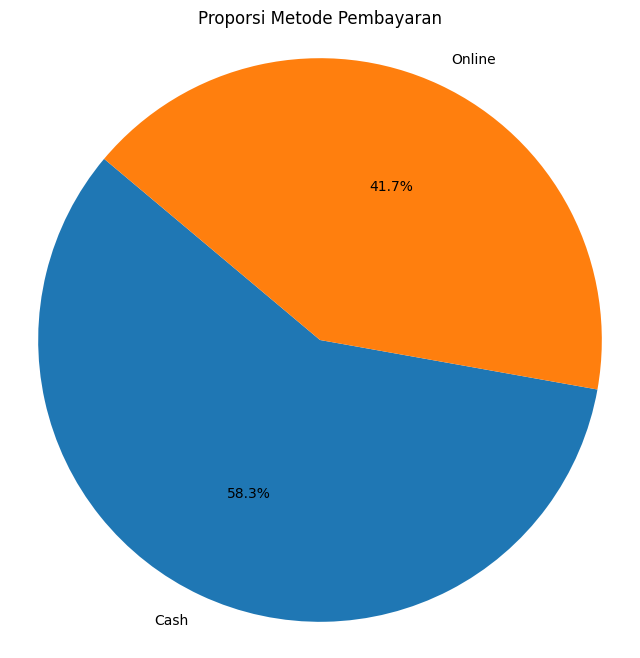

In [ ]:
import matplotlib.pyplot as plt

# Dataframe yang berisi data transaksi
# Saya anggap Anda memiliki DataFrame 'data' dengan kolom 'transaction_type'

# Hitung jumlah transaksi untuk setiap metode pembayaran
transaction_counts = data['transaction_type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(transaction_counts, labels=transaction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Metode Pembayaran')
plt.axis('equal')  # Agar lingkaran menjadi lingkaran sempurna
plt.show()


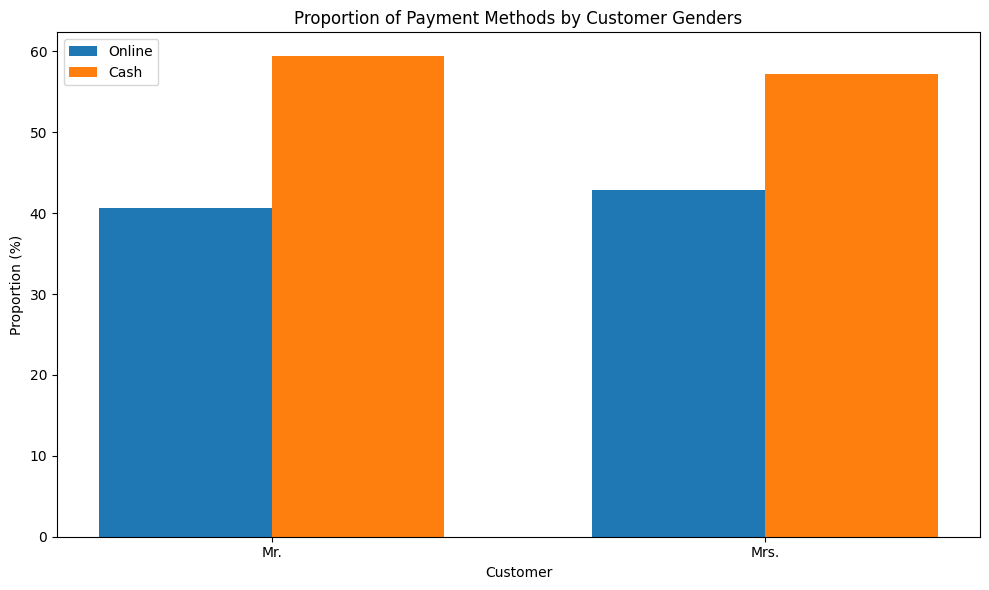

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data yang Anda miliki
# Saya anggap Anda memiliki DataFrame 'data' dengan kolom 'customer_title' dan 'transaction_type'

# Hitung jumlah transaksi untuk setiap kombinasi dari judul pelanggan (Mr. dan Mrs.) dan metode pembayaran (online dan tunai)
transaction_count_by_title_and_type = data.groupby(['received_by', 'transaction_type']).size()

# Hitung jumlah transaksi untuk setiap judul pelanggan (Mr. dan Mrs.)
transaction_count_by_title = data.groupby('received_by').size()

# Hitung proporsi Mr. dan Mrs. dalam metode pembayaran online
proportion_mr_online = (transaction_count_by_title_and_type['Mr.', 'Online'] / transaction_count_by_title['Mr.']) * 100
proportion_mrs_online = (transaction_count_by_title_and_type['Mrs.', 'Online'] / transaction_count_by_title['Mrs.']) * 100

# Hitung proporsi Mr. dan Mrs. dalam metode pembayaran tunai
proportion_mr_cash = (transaction_count_by_title_and_type['Mr.', 'Cash'] / transaction_count_by_title['Mr.']) * 100
proportion_mrs_cash = (transaction_count_by_title_and_type['Mrs.', 'Cash'] / transaction_count_by_title['Mrs.']) * 100

# Menyiapkan data untuk plot
titles = ['Mr.', 'Mrs.']
online_proportions = [proportion_mr_online, proportion_mrs_online]
cash_proportions = [proportion_mr_cash, proportion_mrs_cash]

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(titles))

plt.bar(index, online_proportions, bar_width, label='Online')
plt.bar([i + bar_width for i in index], cash_proportions, bar_width, label='Cash')

plt.xlabel('Customer')
plt.ylabel('Proportion (%)')
plt.title('Proportion of Payment Methods by Customer Genders')
plt.xticks([i + bar_width/2 for i in index], titles)
plt.legend()

plt.tight_layout()
plt.show()



Pelanggan didominasi oleh pria dibanding perempuan. saran saya adalah untuk membuat menu baru yang disukai oleh pria. ini bisa didapatkan dengan menggunakan survei membuat fastfood baru dan meminta para pria untuk menilai apakah layak dan berapakah harga kira kira yang akan dikeluarkan.

# melihat pembayaran apa yang sering dilakukan pelanggan online atau offline

Mayoritas pelanggan suka membayar pakai cash. coba kita lakukan kampanye untuk pemabayaran secara digital seperti promo agar catatan keuangan dan transaksi bisa leih terukur dan terarah dan dapat dilakukan evaluasi terhadap pola pembelian pelanggan

# melihat fastfood apa yang sering dibeli oleh pelanggan wanita dan pria

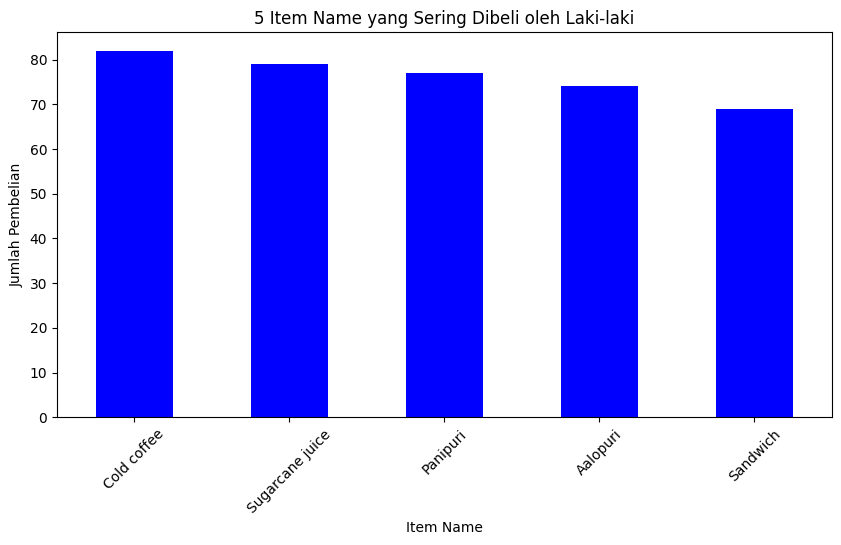

In [ ]:
import matplotlib.pyplot as plt

# Filter data untuk pembelian oleh laki-laki
purchases_by_male = data[data['received_by'] == 'Mr.']

# Filter data untuk pembelian oleh perempuan
purchases_by_female = data[data['received_by'] == 'Mrs.']

# Hitung jumlah pembelian untuk setiap item name oleh laki-laki
top_items_by_male = purchases_by_male['item_name'].value_counts().head()

# Hitung jumlah pembelian untuk setiap item name oleh perempuan
top_items_by_female = purchases_by_female['item_name'].value_counts().head()

# Buat diagram bar untuk pembelian oleh laki-laki
plt.figure(figsize=(10, 5))
top_items_by_male.plot(kind='bar', color='blue')
plt.title('5 Item Name yang Sering Dibeli oleh Laki-laki')
plt.xlabel('Item Name')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.show()



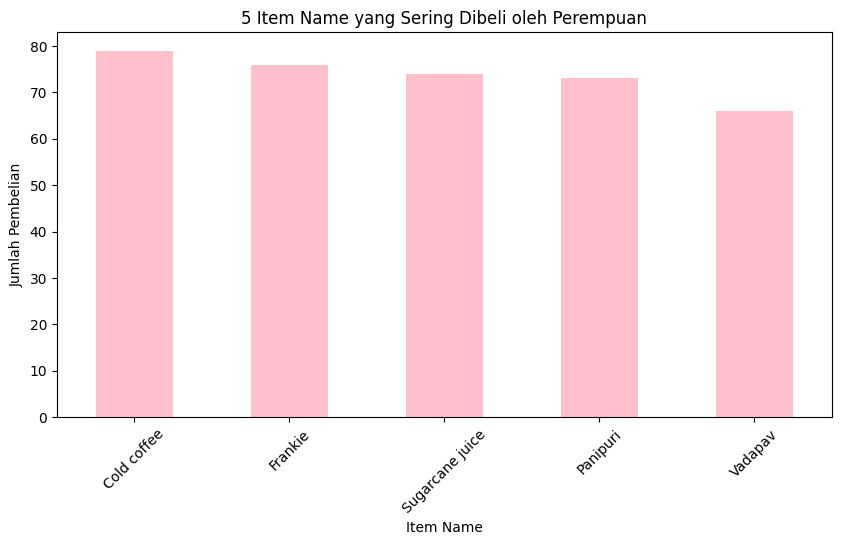

In [ ]:

# Buat diagram bar untuk pembelian oleh perempuan
plt.figure(figsize=(10, 5))
top_items_by_female.plot(kind='bar', color='pink')
plt.title('5 Item Name yang Sering Dibeli oleh Perempuan')
plt.xlabel('Item Name')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.show()


Cold coffe, sugarcane juice dan panipuri menjadi primadona baik pelanggan pria maupun wanita. kita tidak mau terjadinya kekurangan stok atau terjadinya menu kosong pada item name ini. coba untuk memperbanyak menu ini dan melakukan evaluasi terhadap logistik agar jangan adanya delay pada item name ini.

# POLA FASTFOOD FAVORIT PELANGGAN BERDASARKAN WAKTU KUNJUNGAN

In [ ]:
import pandas as pd

# DataFrame
# Saya asumsikan Anda telah memuat data Anda ke dalam DataFrame yang disebut df

# Filter untuk tipe 'fastfood' dan 'beverages'
fastfood_data = data[data['item_type'] == 'Fastfood']
beverages_data = data[data['item_type'] == 'Beverages']

# Menghitung total pesanan setiap item fastfood pada setiap waktu penjualan
total_quantity_fastfood_by_time = fastfood_data.groupby(['time_of_sale', 'item_name'])['quantity'].sum().reset_index()

# Menghitung total pesanan setiap item beverages pada setiap waktu penjualan
total_quantity_beverages_by_time = beverages_data.groupby(['time_of_sale', 'item_name'])['quantity'].sum().reset_index()

# Menemukan item favorit berdasarkan jumlah pesanan tertinggi dari tipe 'fastfood' pada setiap waktu penjualan
favorite_fastfood_by_time = total_quantity_fastfood_by_time.loc[total_quantity_fastfood_by_time.groupby('time_of_sale')['quantity'].idxmax()]

# Menemukan item favorit berdasarkan jumlah pesanan tertinggi dari tipe 'beverages' pada setiap waktu penjualan
favorite_beverages_by_time = total_quantity_beverages_by_time.loc[total_quantity_beverages_by_time.groupby('time_of_sale')['quantity'].idxmax()]

# Menampilkan item favorit dari tipe 'fastfood' dan 'beverages' berdasarkan jumlah pesanan tertinggi pada setiap waktu penjualan
print("Item favorit dari tipe 'fastfood' berdasarkan jumlah pesanan tertinggi pada setiap waktu penjualan:")
(favorite_fastfood_by_time)










Item favorit dari tipe 'fastfood' berdasarkan jumlah pesanan tertinggi pada setiap waktu penjualan:


,time_of_sale,item_name,quantity
1,Afternoon,Frankie,238
7,Evening,Panipuri,241
12,Midnight,Panipuri,278
18,Morning,Sandwich,234
23,Night,Sandwich,292


In [ ]:
import pandas as pd

# DataFrame
# Saya asumsikan Anda telah memuat data Anda ke dalam DataFrame yang disebut df

# Filter untuk tipe 'beverages'
beverages_df = data[data['item_type'] == 'Beverages']

# Menghitung total pesanan setiap item beverages pada setiap waktu penjualan
total_quantity_beverages_by_time = beverages_df.groupby(['time_of_sale', 'item_name'])['quantity'].sum().reset_index()

# Menemukan item favorit berdasarkan jumlah pesanan tertinggi dari tipe 'beverages' pada setiap waktu penjualan
favorite_beverages_by_time = total_quantity_beverages_by_time.loc[total_quantity_beverages_by_time.groupby('time_of_sale')['quantity'].idxmax()]

# Menampilkan item favorit dari tipe 'beverages' berdasarkan jumlah pesanan tertinggi pada setiap waktu penjualan
print("Item favorit dari tipe 'beverages' berdasarkan jumlah pesanan tertinggi pada setiap waktu penjualan:")
(favorite_beverages_by_time)


Item favorit dari tipe 'beverages' berdasarkan jumlah pesanan tertinggi pada setiap waktu penjualan:


,time_of_sale,item_name,quantity
0,Afternoon,Cold coffee,337
3,Evening,Sugarcane juice,283
5,Midnight,Sugarcane juice,237
6,Morning,Cold coffee,287
8,Night,Cold coffee,299


Dapat kita lihat, pembelian fastfood sadwich paling sering   dibeli oleh pelanggan pada pagi dan malam dan juga pada pembelian minuman cold coffe terjadi pada pagi, malam dan siang menjadi favorit pembelian oleh pelanggan. ada baiknya kita membuat promosi paket bundle untuk paket breakfast yaitu cold coffe dan sandwich.
  
  untuk siang hari fastfood frankie dan cold coffe dapat juga kita jadikan bagian promo paket bundle untuk lunchtime.

  kita lihat juga pada sore hari dan tengah malam panipuri dan sugarcane juice menjadi favorit kita bisa membuat paket bundle juga.

kita juga dapat melakukan evaluasi seberapa cepat pelayanan kita apakah berpengaruh terhadap mood pelanggan untuk membeli. apabila hal tersebut berpengaruh kita dapat meningkatkan efisiensi waktu pekerjaan.


In [ ]:
import pandas as pd

# Hitung total quantity yang dipesan untuk setiap item name
total_quantity_by_item = data.groupby('item_name')['quantity'].sum()

# Temukan 5 item name favorit berdasarkan total quantity yang dipesan
top_5_favorite_items = total_quantity_by_item.nlargest(5)

# Hitung rata-rata quantity yang dipesan terhadap item name tersebut dalam satu kali transaksi
average_quantity_per_transaction = total_quantity_by_item / data['item_name'].value_counts()

# Buat DataFrame dari hasil perhitungan
summary_data = pd.DataFrame({
    'Total Quantity': top_5_favorite_items,
    'Rata-rata Quantity per Transaksi': average_quantity_per_transaction[top_5_favorite_items.index].round(2)
})

# Tampilkan DataFrame
print("Ringkasan 5 Item Name Favorit:")
(summary_data)


Ringkasan 5 Item Name Favorit:


,Total Quantity,Rata-rata Quantity per Transaksi
item_name,,
Cold coffee,1361,8.45
Sugarcane juice,1278,8.35
Panipuri,1226,8.17
Frankie,1150,8.27
Sandwich,1097,8.50


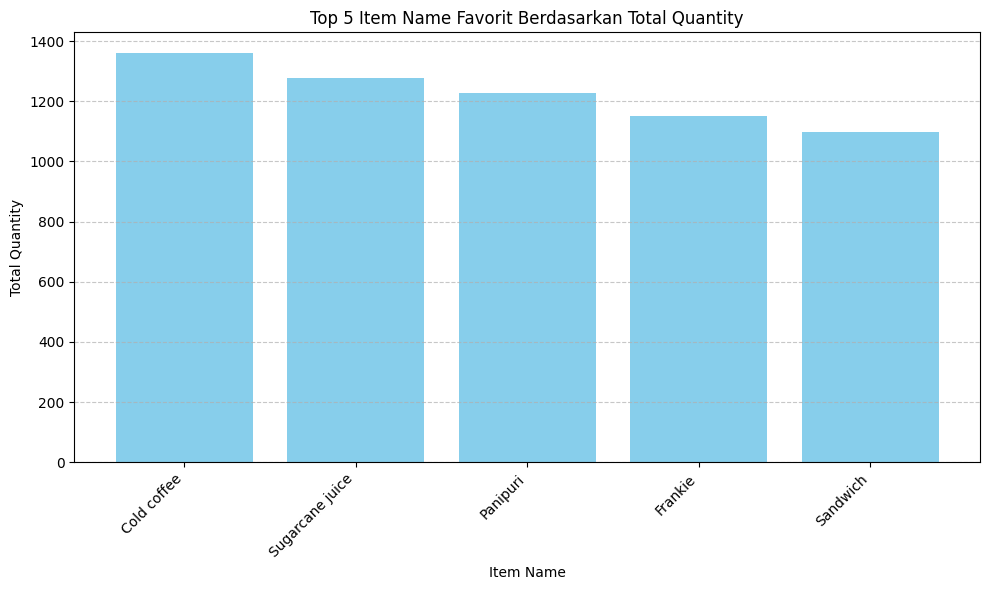

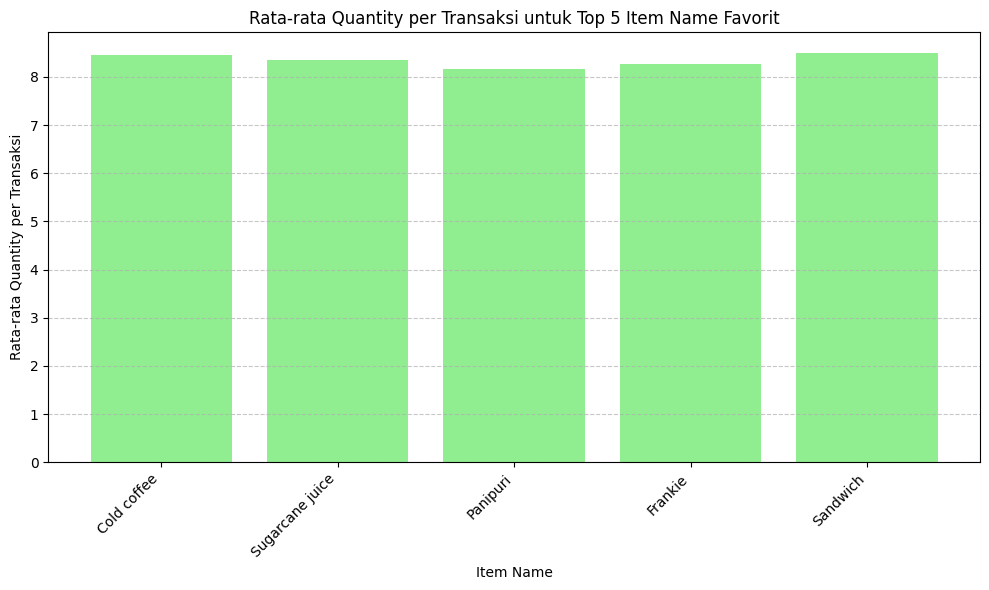

In [ ]:
import matplotlib.pyplot as plt

# Ubah nama kolom dari indeks agar lebih jelas saat diplot
summary_data.index.name = 'Item Name'

# Plot diagram batang untuk 5 item name favorit berdasarkan total quantity
plt.figure(figsize=(10, 6))
plt.bar(summary_data.index, summary_data['Total Quantity'], color='skyblue')
plt.title('Top 5 Item Name Favorit Berdasarkan Total Quantity')
plt.xlabel('Item Name')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot diagram batang untuk rata-rata quantity per transaksi
plt.figure(figsize=(10, 6))
plt.bar(summary_data.index, summary_data['Rata-rata Quantity per Transaksi'], color='lightgreen')
plt.title('Rata-rata Quantity per Transaksi untuk Top 5 Item Name Favorit')
plt.xlabel('Item Name')
plt.ylabel('Rata-rata Quantity per Transaksi')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
